In this file we do an exploratory data analysis(EDA) and data cleaning and preprocessing on the training and test data sets.

We present in the next table the variables associated with our dataset for the auto loan application analysis. This table includes features that help us understand and predict loan application outcomes.

| **Variable**                          | **Description**                                                                                                                |
|---------------------------------------|--------------------------------------------------------------------------------------------------------------------------------|
| **fico**                              | FICO score at origination (valid range 250-900).                                                                                |
| **amtfinanced_lreq**                  | Requested loan amount.                                                                                                         |
| **collateral_dlrinput_newuse_d_lreq** | New/Used vehicle purchased.                                                                                                    |
| **pti_lreq**                          | Payment to income ratio.                                                                                                       |
| **ltv_lreq**                          | Loan to value ratio.                                                                                                           |
| **pl2_reh7120_a**                     | Maximum single balance to credit amount ratio on an open revolving trade reported in the last 6 months with credit amount > $0, excluding home equity line of credit trades. |
| **pl2_bcx7110_a**                     | Overall balance to credit amount ratio on open revolving bankcard trades reported in the last 6 months with credit amount > $0, excluding authorized user trades. |
| **pl2_all7170_a**                     | Overall amount past due to balance ratio on trades reported in the last 6 months excluding collections.                        |
| **pl2_aut7110_a**                     | Overall balance to credit amount ratio on open auto loan trades reported in the last 6 months with credit amount > $0.          |
| **pl2_all7120_a**                     | Maximum single balance to credit amount ratio on an open trade reported in the last 6 months with credit amount > $0.          |
| **pl2_all7937_a**                     | Percentage of trades reported in the last 12 months including collections that are never delinquent or derogatory occurred in the last 12 months. |
| **pl2_bcc8120_a**                     | Number of months since the most recently opened revolving bankcard trade including indeterminates.                           |
| **pl2_iln7410_a**                     | Percentage of installment trades that are open and reported in the last 6 months.                                             |
| **pl2_revl300_a**                     | Total number of revolving trades never delinquent or derogatory.                                                              |
| **pl2_all8150_a**                     | Number of months since the most recent 30 days delinquency on trades, excluding collections and other unsatisfied derogatory including indeterminates. |
| **pl2_bca8370_a**                     | Average life span of a bankcard revolving and charge trade (in months) including indeterminates.                               |
| **pl2_all7517_a**                     | Percentage of open trades that were opened in the last 12 months.                                                              |
| **pl2_iln8220_a**                     | Number of months since the oldest installment trade was opened including indeterminates.                                       |
| **pl2_all6250_a**                     | Worst ever status on a trade in the first 12 months of open date excluding collections including indeterminates.               |
| **pl2_aua815l_a**                     | Number of months since the most recent 30-180 days delinquency on auto loan or lease trades, excluding unsatisfied derogatory including indeterminates. |
| **pl2_rtr7110_a**                     | Overall balance to credit amount ratio on open revolving retail trades reported in the last 6 months with credit amount > $0. |
| **pl2_pil8120_a**                     | Number of months since the most recently opened personal installment trade including indeterminates.                         |
| **pl2_aua0300_a**                     | Total number of auto loan or lease trades.                                                                                      |
| **pl2_all7938_a**                     | Percentage of trades reported in the last 24 months including collections that are never delinquent or derogatory occurred in the last 24 months. |
| **pl2_bcc3456_a**                     | Total number of open revolving bankcard trades with credit amount >= $5000 reported in the last 6 months.                     |
| **pl2_all8370_a**                     | Average life span of a trade (in months) excluding collections including indeterminates.                                       |
| **pl2_aua8220_a**                     | Number of months since the oldest auto loan or lease trade was opened including indeterminates.                                |
| **pl2_alsl300_a**                     | Total number of trades never delinquent or derogatory excluding student loans.                                                 |
| **pl2_aua6200_a**                     | Worst ever status on an auto loan or lease trade including indeterminates.                                                     |
| **pl2_all2427_a**                     | Total number of trades opened in the last 12 months ever 30 or more days delinquent or derogatory excluding collections.       |
| **pl2_alm6200_a**                     | Worst ever status on a trade including non-medical collections and indeterminates.                                             |
| **pl2_all697l_a**                     | Worst ever status on a trade in the last 12 months including unsatisfied collections and indeterminates.                      |
| **clntr9437_a**                       | Total number of non-traditional cluster inquiries in the last 12 months.                                                       |
| **clact9429_a**                       | Total number of inquiries made in the last 365 days.                                                                            |
| **clall5010_a**                       | Balance on open or closed trades.                                                                                              |
| **clall2434_a**                       | Total number of trades ever 90+ days delinquency or derogatory occurred in the last 30 days.                                  |
| **cloil0214_a**                       | Total number of paid off online installment trades in the last 30 days.                                                        |
| **cltra4405_a**                       | Total number of traditional 90+ days delinquency occurrences in the last 3 months.                                            |
| **clact9428_a**                       | Total number of inquiries made in the last 90 days.                                                                            |
| **Gender**                            | Gender of the primary applicant.                                                                                               |
| **Race**                              | Race of the primary applicant.                                                                                                 |
| **aprv_flag**                         | Indicator of approval. 1 = approved the auto loan application; 0 = rejected the application.                                   |
| **bad_flag**                          | Loan performance in recent 12 months. 1 = Never delinquent or 2 times or less 30 DPD; 0 = One-time 60 DPD or worse, charge off, bankruptcy, and repossession. |


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import xgboost as xgb
from sklearn.impute import SimpleImputer
from scipy import stats

In [164]:
train_df_original = pd.read_csv("/Users/heba/Desktop/Erdos/Training Dataset A_R-384891_Candidate Attach #1_PresSE_SRF #1142.csv")
test_df_original = pd.read_csv("/Users/heba/Desktop/Erdos/Evaluation Dataset B_R-384891_Candidate Attach #2_PresSE_SRF #1142.csv")
# Create copies for processing
train_df = train_df_original.copy()
test_df = test_df_original.copy()

Exploratory Data Analysis

In [165]:
train_df.head()

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,clntr9437_a,clact9429_a,clall5010_a,clall2434_a,cloil0214_a,cltra4405_a,clact9428_a,bad_flag,Gender,Race
0,581.0,0,32115.0,NEW,15.29,105.30,72.0,72.0,3.0,84.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,White
1,707.0,1,21436.0,USED,4.63,102.12,100.0,84.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Male,White
2,689.0,0,26930.0,USED,6.61,109.24,76.0,13.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Undefined,White
3,811.0,1,18140.0,USED,3.08,49.03,12.0,12.0,0.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,Other
4,631.0,0,9874.0,USED,2.62,140.56,NaN,NaN,0.0,NaN,...,7.0,21.0,NaN,NaN,NaN,NaN,5.0,0.0,Male,White


In [166]:
test_df.head()

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,clntr9437_a,clact9429_a,clall5010_a,clall2434_a,cloil0214_a,cltra4405_a,clact9428_a,bad_flag,Gender,Race
0,681.0,1,30966.0,USED,4.74,91.96,85.0,70.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Undefined,White
1,626.0,0,18363.0,USED,3.37,87.90,NaN,NaN,0.0,85.0,...,3.0,3.0,NaN,NaN,NaN,NaN,0.0,0.0,Female,White
2,776.0,1,50768.0,NEW,3.86,107.87,22.0,18.0,0.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,Hispanic
3,721.0,1,49657.0,NEW,3.71,99.36,93.0,83.0,0.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Male,White
4,NaN,0,14412.0,USED,7.94,111.50,42.0,20.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Female,White


In [167]:
train_df['Gender'].unique() #There are two genders: Females and Males, in addition to some undefined.

array(['Female', 'Male', 'Undefined'], dtype=object)

In [168]:
train_df['Race'].unique() #There are several races: Hispanic, White, Black, Asian, in addition to some others.

array(['White', 'Other', 'Hispanic', 'Black', 'Asian'], dtype=object)

In [169]:
train_df['collateral_dlrinput_newused_1req'].unique() #There are two types of vehicles: New and used.

array(['NEW', 'USED'], dtype=object)

In [170]:
# Display basic info
def data_overview(df, name):
    print(f"\n{name} Dataset Info:")
    print(df.info())
    print("\nMissing Values:")
    print(df.isnull().sum())
    print(((df.isnull().sum()/len(df))*100).round(2))
    print("\nDuplicate Rows:", df.duplicated().sum())
    print("\nBasic Statistics:")
    print(df.describe())

data_overview(train_df, "Training")
data_overview(test_df, "Testing")


Training Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21606 entries, 0 to 21605
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   fico                              21431 non-null  float64
 1   aprv_flag                         21606 non-null  int64  
 2   amtfinanced_1req                  21606 non-null  float64
 3   collateral_dlrinput_newused_1req  21606 non-null  object 
 4   pti_1req                          21603 non-null  float64
 5   ltv_1req                          21601 non-null  float64
 6   p12_reh7120_a                     19694 non-null  float64
 7   p12_bcx7110_a                     17917 non-null  float64
 8   p12_all7170_a                     20943 non-null  float64
 9   p12_aut7110_a                     11070 non-null  float64
 10  p12_all7120_a                     21226 non-null  float64
 11  p12_all7937_a                     21522 non

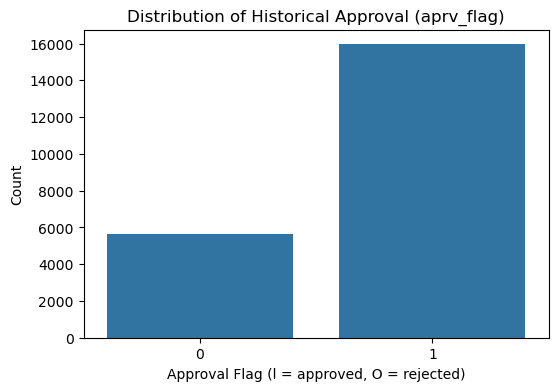

In [171]:
# Distribution of approval decisions
plt.figure(figsize=(6,4))
sns.countplot(x='aprv_flag', data=train_df)
plt.title('Distribution of Historical Approval (aprv_flag)')
plt.xlabel('Approval Flag (l = approved, O = rejected)')
plt.ylabel('Count')
plt.show()

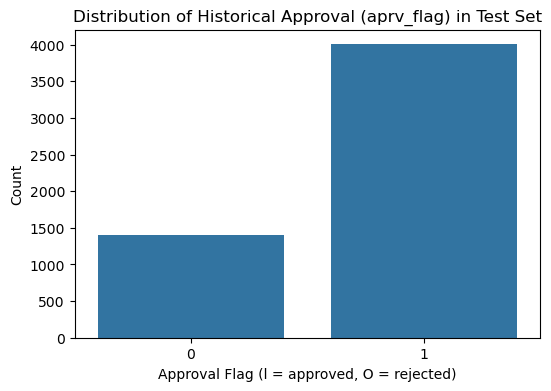

In [172]:
# Distribution of approval decisions in Test set
plt.figure(figsize=(6,4))
sns.countplot(x='aprv_flag', data=test_df)
plt.title('Distribution of Historical Approval (aprv_flag) in Test Set')
plt.xlabel('Approval Flag (l = approved, O = rejected)')
plt.ylabel('Count')
plt.show()

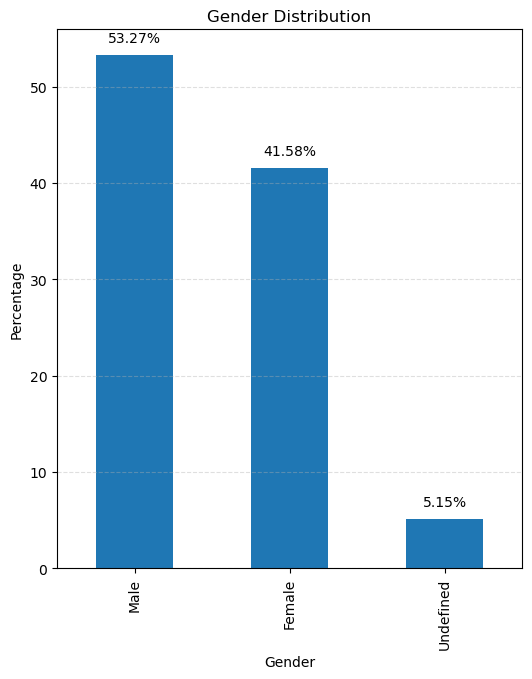

In [173]:
# Distribution of the gender as a percentage
gender_counts= train_df['Gender'].value_counts()
gender_percent = (gender_counts/gender_counts.sum())*100
plt.figure(figsize=(6,7))
gender_percent.plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle= '--', alpha=0.4)

# Annotate each bar with number
for i, perc in enumerate(gender_percent):
    plt.text(i, perc+1, f'{perc:.2f}%', ha='center', va='bottom', fontsize=10) 
plt.show()

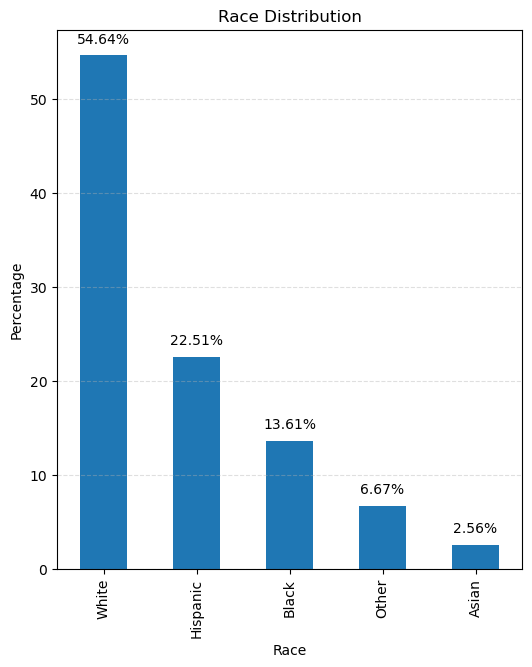

In [174]:
# Distribution of the race as a percentage
race_counts= train_df['Race'].value_counts()
race_percent = (race_counts/race_counts.sum())*100
plt.figure(figsize=(6,7))
race_percent.plot(kind='bar')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.grid(axis='y',linestyle= '--', alpha=0.4)

# Annotate each bar with number
for i, perc in enumerate(race_percent):
    plt.text(i, perc+1, f'{perc:.2f}%', ha='center', va='bottom', fontsize=10) 
plt.show()

In [175]:
approval_rate = train_df['aprv_flag'].mean()
bad_flag_approval = train_df[train_df['aprv_flag'] == 1]['bad_flag'].mean()

print("approval rate: ", approval_rate, "\nbad flag approval rate: ", bad_flag_approval)

approval rate:  0.7383134314542257 
bad flag approval rate:  0.025328448711470438


Around 74% of the applicants were approved for the auto loan, and of these approved loans, 2.5% has poor performance.

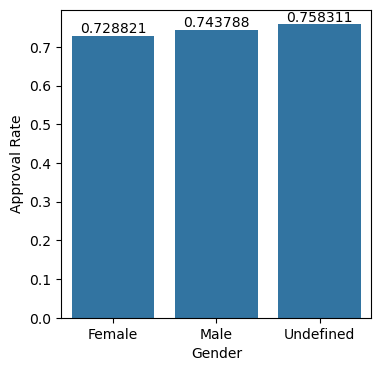

In [176]:
gender_approval = train_df.groupby('Gender')['aprv_flag'].agg('mean')

plt.figure(figsize=(4, 4))

ax = sns.barplot(pd.DataFrame(data = gender_approval), x = 'Gender', y = 'aprv_flag')
ax.bar_label(ax.containers[0])
ax.set_ylabel('Approval Rate')
plt.show()

Females have a bit slightly lower approval rate than males. 

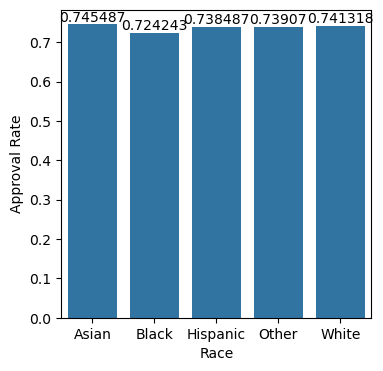

In [177]:
racial_approval = train_df.groupby('Race')['aprv_flag'].agg('mean')

plt.figure(figsize=(4, 4))

ax = sns.barplot(pd.DataFrame(data = racial_approval), x = 'Race', y = 'aprv_flag')
ax.bar_label(ax.containers[0])
ax.set_ylabel('Approval Rate')
plt.show()

Asians have the highest approval rate and black have the lowest approval rate.

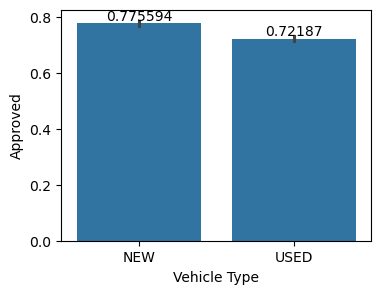

In [178]:
plt.figure(figsize=(4, 3))

ax = sns.barplot(data=train_df, x='collateral_dlrinput_newused_1req', y='aprv_flag')

ax.bar_label(ax.containers[0])
ax.set_xlabel('Vehicle Type')
ax.set_ylabel('Approved')
plt.show()

Loan for new cars was approved at a higher rate than used cars. 

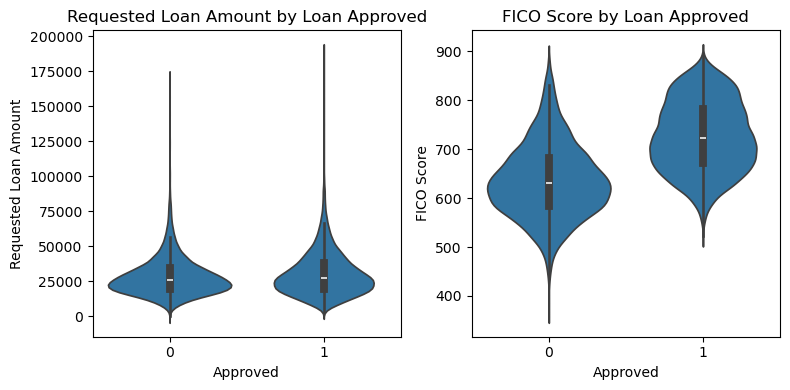

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.ravel()

for i, col in enumerate(['amtfinanced_1req', 'fico']):
    col_name = {'amtfinanced_1req': 'Requested Loan Amount', 'fico': 'FICO Score'}
    ax = sns.violinplot(data = train_df, x = 'aprv_flag', y = col, ax = axes[i])
    axes[i].set_title(f'{col_name[col]} by Loan Approved')
    ax.set_ylabel(col_name[col])
    ax.set_xlabel('Approved')

plt.tight_layout()
plt.show()

The violin plot of the "Requested Loan Amount by Loan Approved" shows that both approved and non approved loan are concentrated at lower loan amounts, indicating that the "Requested Loan Amount" may not be a strong predictor or loan approval. Moreover, the violin plot shows some high outliers. 

The violin plot of "FICO Score by Loan Approved" shows that approved loans have higher FICO scores. For rejected loans, the distribution is wider and more spread out indicating that there is a greater variability in FICO scores for rejected loans. While for accepted loans, the distribution is more concentrated around higher scores (600–800)

Data Cleaning and Pre-processing 

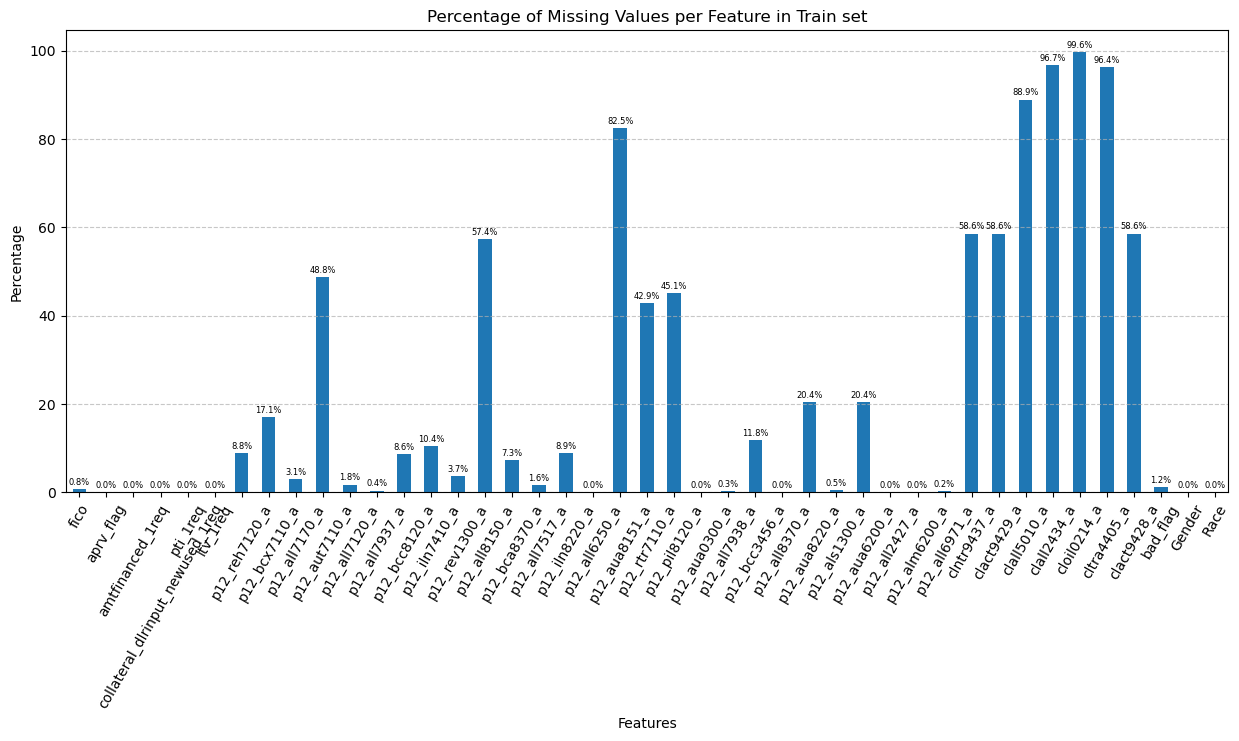

In [180]:
# Plot the percentage of the missing data in train_df
missing_percent = ((train_df.isnull().sum()/len(train_df))*100).round(2)
plt.figure(figsize=(15, 6))
missing_percent.plot(kind='bar')
plt.title('Percentage of Missing Values per Feature in Train set')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with percentage
for i, v in enumerate(missing_percent):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=6)
plt.show()

In [181]:
#Dropping columns that have more than 80% of missing data in train
high_missing_columns = missing_percent[missing_percent > 80].index.tolist()
print(high_missing_columns)

['p12_aua8151_a', 'clall5010_a', 'clall2434_a', 'cloil0214_a', 'cltra4405_a']


In [182]:
train_df1 = train_df.loc[:,missing_percent<=80]
train_df1.head()

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,p12_aua6200_a,p12_all2427_a,p12_alm6200_a,p12_all6971_a,clntr9437_a,clact9429_a,clact9428_a,bad_flag,Gender,Race
0,581.0,0,32115.0,NEW,15.29,105.30,72.0,72.0,3.0,84.0,...,1.0,0,400,400.0,NaN,NaN,NaN,0.0,Female,White
1,707.0,1,21436.0,USED,4.63,102.12,100.0,84.0,0.0,NaN,...,NaN,0,1,1.0,NaN,NaN,NaN,0.0,Male,White
2,689.0,0,26930.0,USED,6.61,109.24,76.0,13.0,0.0,NaN,...,NaN,0,90,1.0,NaN,NaN,NaN,0.0,Undefined,White
3,811.0,1,18140.0,USED,3.08,49.03,12.0,12.0,0.0,34.0,...,1.0,0,1,1.0,NaN,NaN,NaN,0.0,Female,Other
4,631.0,0,9874.0,USED,2.62,140.56,NaN,NaN,0.0,NaN,...,400.0,0,400,90.0,7.0,21.0,5.0,0.0,Male,White


In [183]:
train_df1.shape

(21606, 38)

In [184]:
#Dropping columns that have more than 80% of missing data
high_missing_columns = missing_percent[missing_percent > 80].index.tolist()
print(high_missing_columns)

['p12_aua8151_a', 'clall5010_a', 'clall2434_a', 'cloil0214_a', 'cltra4405_a']


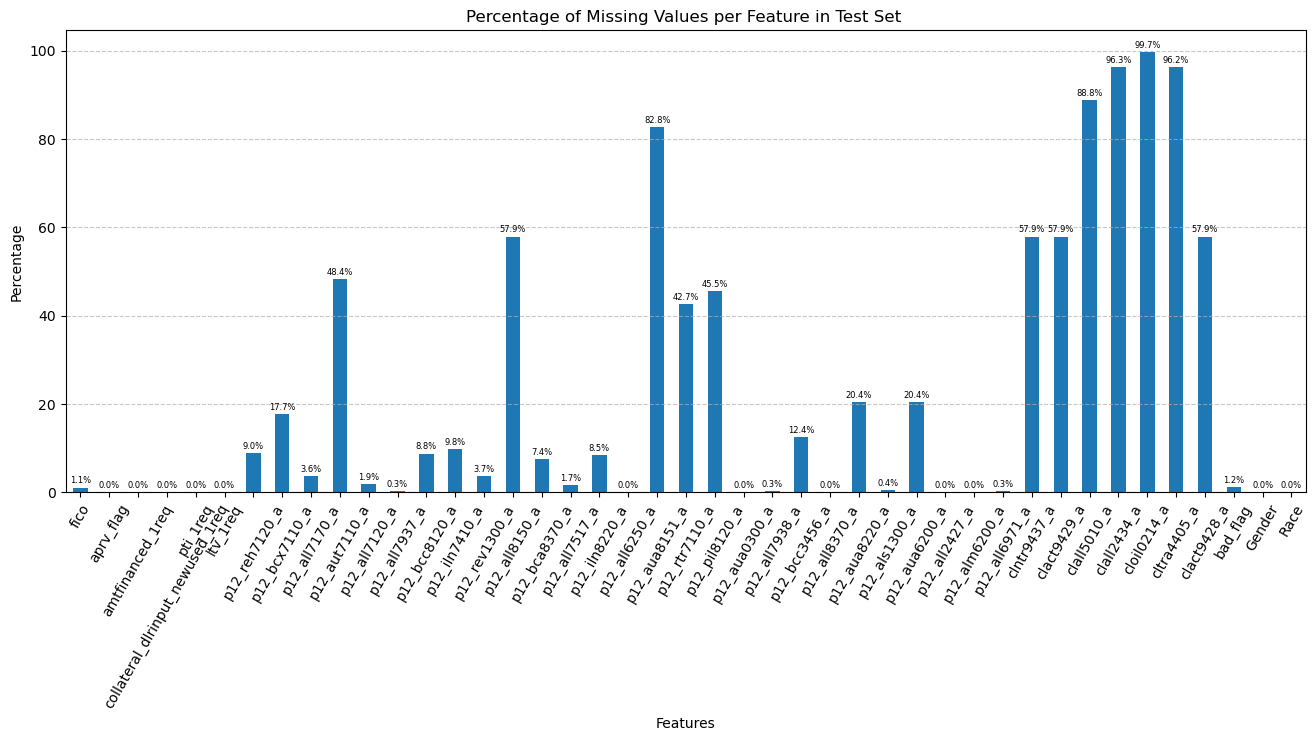

In [185]:
# Plot the percentage of the missing data in test_df
missing_percent_test = ((test_df.isnull().sum()/len(test_df))*100).round(2)
plt.figure(figsize=(16, 6))
missing_percent_test.plot(kind='bar')
plt.title('Percentage of Missing Values per Feature in Test Set ')
plt.xlabel('Features')
plt.ylabel('Percentage')
plt.xticks(rotation=60)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate each bar with percentage
for i, v in enumerate(missing_percent_test):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom', fontsize=6)
plt.show()

In [186]:
#Dropping columns that have more than 80% of missing data in test
high_missing_columns_test = missing_percent_test[missing_percent_test > 80].index.tolist()
print(high_missing_columns_test)

['p12_aua8151_a', 'clall5010_a', 'clall2434_a', 'cloil0214_a', 'cltra4405_a']


In [187]:
test_df1 = test_df.loc[:,missing_percent_test<=80]
test_df1.head()

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,p12_aua6200_a,p12_all2427_a,p12_alm6200_a,p12_all6971_a,clntr9437_a,clact9429_a,clact9428_a,bad_flag,Gender,Race
0,681.0,1,30966.0,USED,4.74,91.96,85.0,70.0,0.0,NaN,...,NaN,0,30,1.0,NaN,NaN,NaN,0.0,Undefined,White
1,626.0,0,18363.0,USED,3.37,87.90,NaN,NaN,0.0,85.0,...,400.0,0,400,400.0,3.0,3.0,0.0,0.0,Female,White
2,776.0,1,50768.0,NEW,3.86,107.87,22.0,18.0,0.0,83.0,...,1.0,0,30,1.0,NaN,NaN,NaN,0.0,Female,Hispanic
3,721.0,1,49657.0,NEW,3.71,99.36,93.0,83.0,0.0,61.0,...,60.0,0,90,1.0,NaN,NaN,NaN,0.0,Male,White
4,NaN,0,14412.0,USED,7.94,111.50,42.0,20.0,0.0,NaN,...,NaN,0,1,1.0,NaN,NaN,NaN,0.0,Female,White


In [188]:
test_df1.shape

(5400, 38)

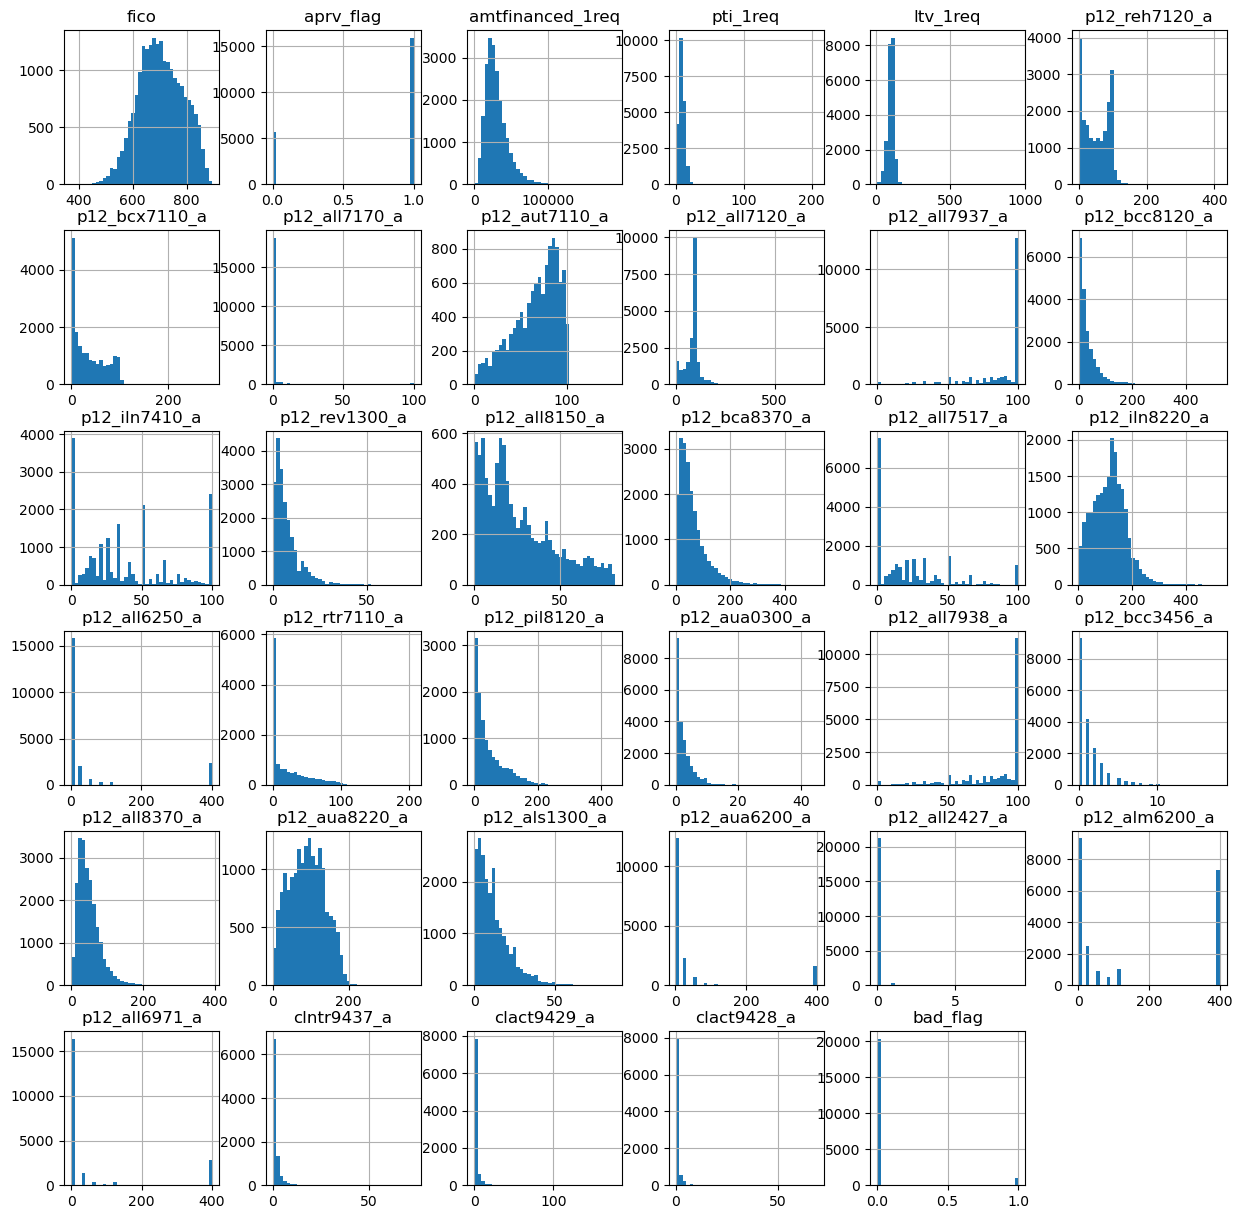

In [189]:
train_df1.hist(bins=40 , figsize=(15,15))
plt.show()

In [190]:
#Removing features that could reduce fair lending opportunities

#train_df1= train_df1.drop(columns = ['Race', 'Gender', 'bad_flag'])
#test_df1=test_df1.drop(columns = ['Race', 'Gender', 'bad_flag'])

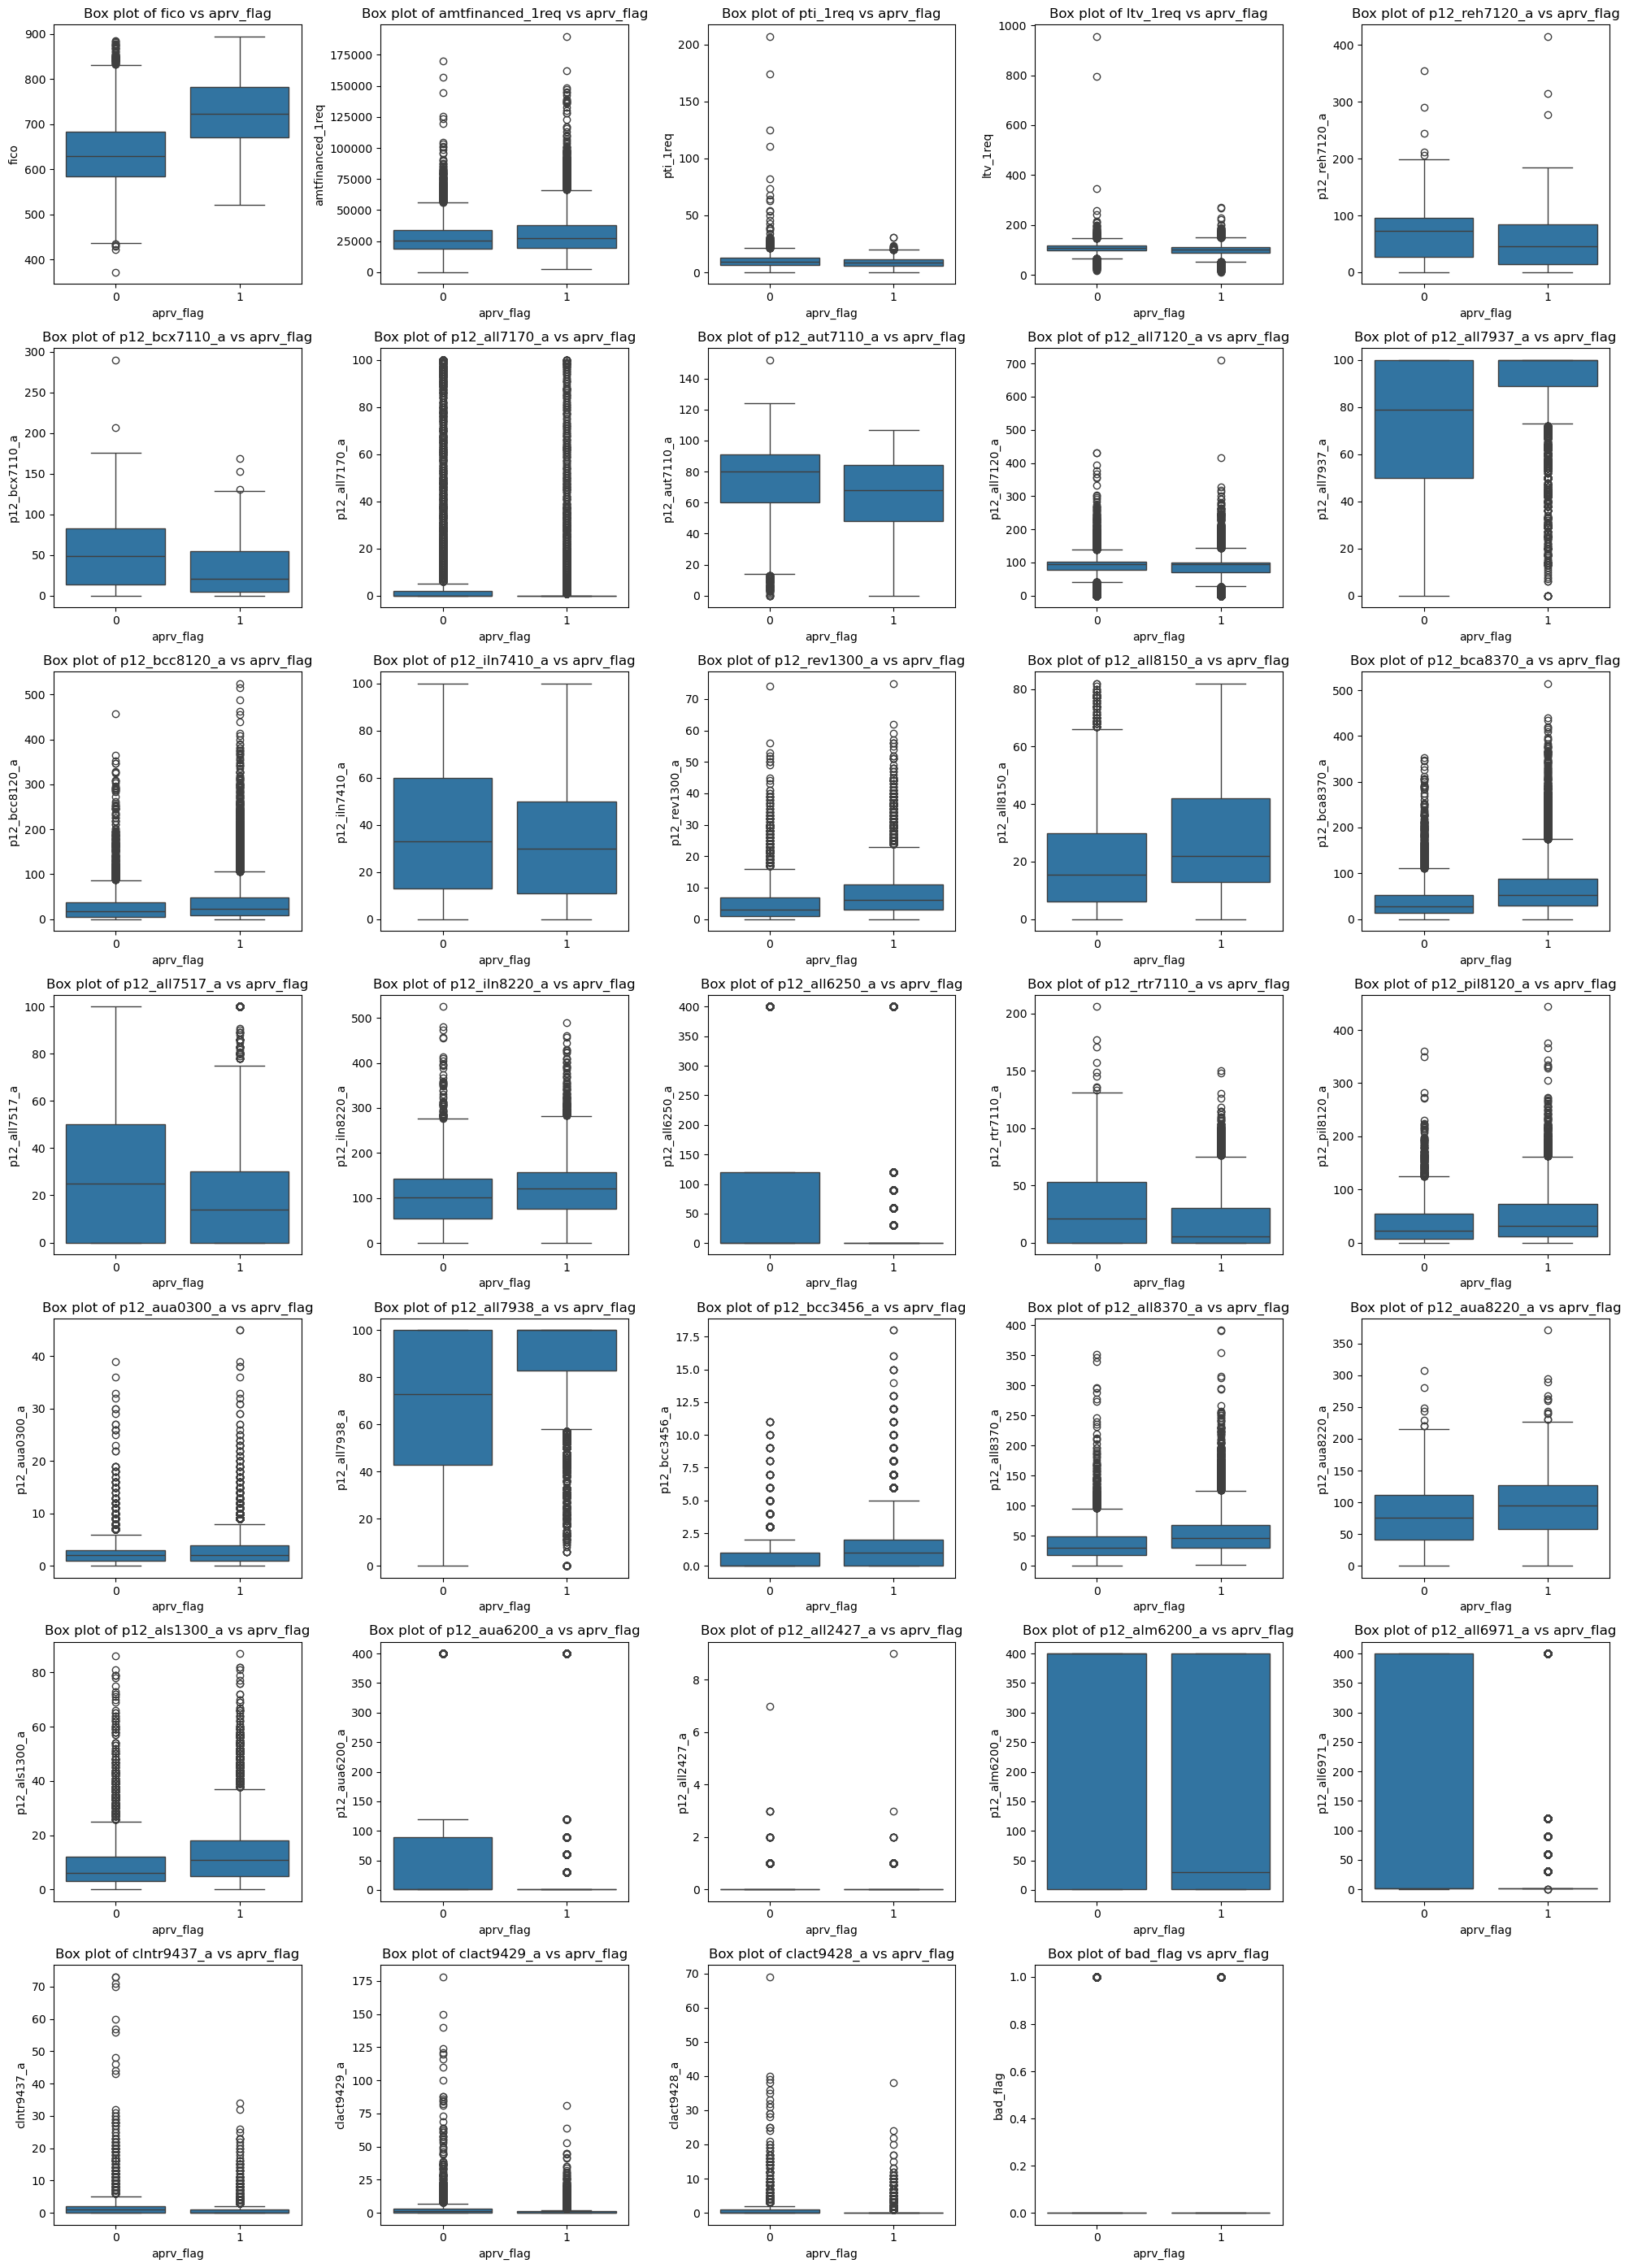

In [191]:
# List of numerical columns (excluding 'aprv_flag')
num_cols = [col for col in train_df1.columns if col != 'aprv_flag' and train_df1[col].dtype in ['int64', 'float64']]

# Calculate the number of rows and columns needed for the grid
n_cols = 5  # You can adjust this number as needed
n_rows = int(np.ceil(len(num_cols) / n_cols))  # Calculate number of rows

# Set up the matplotlib figure
plt.figure(figsize=(n_cols * 4, n_rows * 4))  # Adjust the size to accommodate all plots

# Create box plots for each numerical column against 'bad_flag'
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # Adjust grid size based on n_rows and n_cols
    sns.boxplot(x='aprv_flag', y=col, data=train_df1)
    plt.title(f'Box plot of {col} vs aprv_flag')

plt.tight_layout()  
plt.show()

The box plot showed that our data has high outliers, so we need to cap it at 99th. Thus, we can reduce the impact of those values on our models later 

In [192]:
#Capping columns at 99th percentile
def cap_outliers(df, cols, percentile=0.99):
    for col in cols:
        if df[col].dtype.kind in 'biufc':  # Ensure the column is numeric
            upper_limit = df[col].quantile(percentile)
            # Clip values and cast back to the original column type
            df.loc[:, col] = df[col].clip(upper=upper_limit).astype(df[col].dtype)
    return df

# Apply capping on the training and test data
train_df1 = cap_outliers(train_df1, num_cols, percentile=0.99)
test_df1 = cap_outliers(test_df1, num_cols, percentile=0.99)

In [193]:
# Clean column names by removing leading/trailing spaces
train_df1.columns = train_df1.columns.str.strip()
test_df1.columns = test_df1.columns.str.strip()

# Print the available columns to verify
print("Train columns:", train_df1.columns.tolist())
print("Test columns:", test_df1.columns.tolist())

# Manually specify categorical columns (excluding 'Gender' and 'Race')
manual_cat_cols = ['collateral_dlrinput_newused_1req']  

# Auto-detect other categorical columns
cat_cols = train_df1.select_dtypes(include=['object']).columns

# Combine manually specified categorical columns with auto-detected ones
cat_cols = list(set(cat_cols) | set(manual_cat_cols))

# Exclude 'aprv_flag' from the categorical list, but keep 'Gender' and 'Race'
cat_cols = [col for col in cat_cols if col not in ['aprv_flag']]

# Debugging: Check the categorical columns that will be imputed
print(f"Categorical columns before imputation: {cat_cols}")
if len(cat_cols) == 0:
    raise ValueError("No categorical columns found after excluding 'aprv_flag', 'Gender', and 'Race'.")

# Impute categorical features using SimpleImputer (most frequent strategy)
cat_imputer = SimpleImputer(strategy="most_frequent")

# Impute the categorical columns in train and test data using .loc
train_df1.loc[:, cat_cols] = cat_imputer.fit_transform(train_df1[cat_cols])
test_df1.loc[:, cat_cols] = cat_imputer.transform(test_df1[cat_cols])

# Impute numerical features using SimpleImputer (median strategy)
num_imputer = SimpleImputer(strategy="median")



# Impute the numerical columns in train and test data using .loc
train_df1.loc[:, num_cols] = num_imputer.fit_transform(train_df1[num_cols])
test_df1.loc[:, num_cols] = num_imputer.transform(test_df1[num_cols])

# Check the resulting DataFrame to verify imputation
print("Train DataFrame after imputation:")
print(train_df1.head())
print("Test DataFrame after imputation:")
print(test_df1.head())

Train columns: ['fico', 'aprv_flag', 'amtfinanced_1req', 'collateral_dlrinput_newused_1req', 'pti_1req', 'ltv_1req', 'p12_reh7120_a', 'p12_bcx7110_a', 'p12_all7170_a', 'p12_aut7110_a', 'p12_all7120_a', 'p12_all7937_a', 'p12_bcc8120_a', 'p12_iln7410_a', 'p12_rev1300_a', 'p12_all8150_a', 'p12_bca8370_a', 'p12_all7517_a', 'p12_iln8220_a', 'p12_all6250_a', 'p12_rtr7110_a', 'p12_pil8120_a', 'p12_aua0300_a', 'p12_all7938_a', 'p12_bcc3456_a', 'p12_all8370_a', 'p12_aua8220_a', 'p12_als1300_a', 'p12_aua6200_a', 'p12_all2427_a', 'p12_alm6200_a', 'p12_all6971_a', 'clntr9437_a', 'clact9429_a', 'clact9428_a', 'bad_flag', 'Gender', 'Race']
Test columns: ['fico', 'aprv_flag', 'amtfinanced_1req', 'collateral_dlrinput_newused_1req', 'pti_1req', 'ltv_1req', 'p12_reh7120_a', 'p12_bcx7110_a', 'p12_all7170_a', 'p12_aut7110_a', 'p12_all7120_a', 'p12_all7937_a', 'p12_bcc8120_a', 'p12_iln7410_a', 'p12_rev1300_a', 'p12_all8150_a', 'p12_bca8370_a', 'p12_all7517_a', 'p12_iln8220_a', 'p12_all6250_a', 'p12_rtr7110

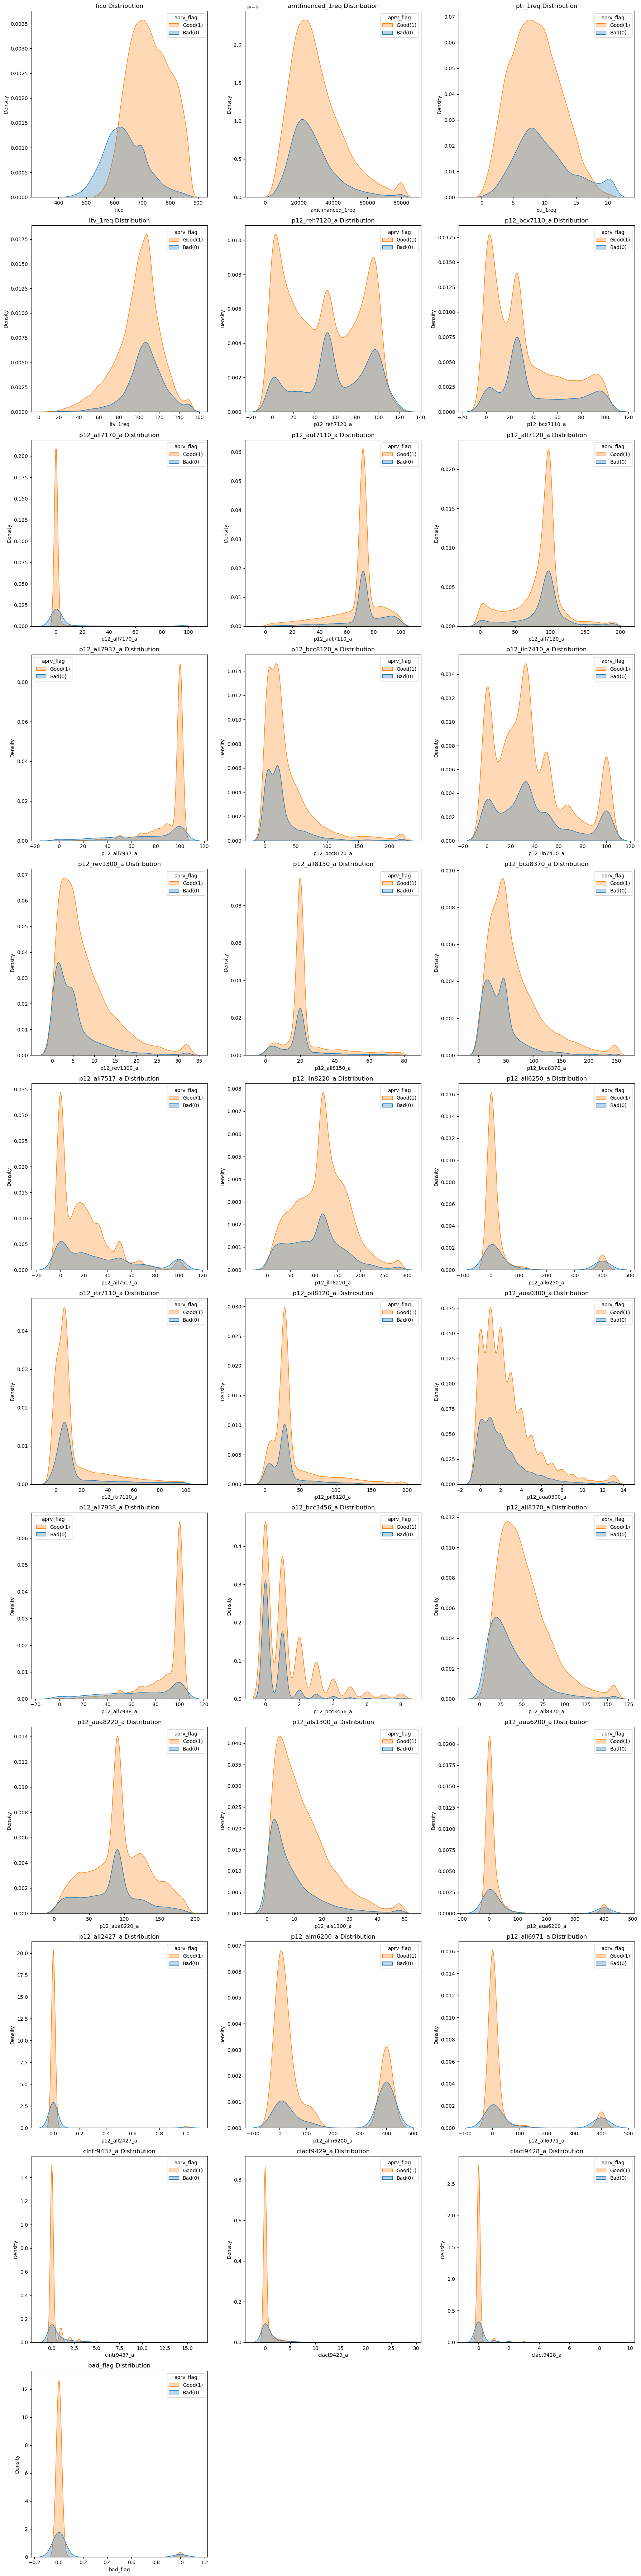

In [194]:
# Get the list of numerical predictors
numerical_predictors = train_df1.select_dtypes(include=['float64', 'int64']).drop(columns=['aprv_flag'], errors='ignore').columns.tolist()

# Create a grid of subplots (you can adjust the number of rows and columns)
num_plots = len(numerical_predictors)
cols = 3  # Set number of columns, you can adjust this number as needed
rows = (num_plots // cols) + (num_plots % cols > 0)  # Calculate number of rows needed

# Create a figure with multiple subplots
fig, axes = plt.subplots(rows, cols, figsize=(cols * 6, rows * 6))
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

# Loop through the predictors and plot the KDE plot for each
for i, predictor in enumerate(numerical_predictors):
    sns.kdeplot(data=train_df1, x=predictor, hue='aprv_flag', fill=True, alpha=0.3, ax=axes[i])
    axes[i].set_title(f'{predictor} Distribution')
    axes[i].set_xlabel(predictor)  # Represents value of the predictor 
    axes[i].set_ylabel('Density')  # Represents the probability density function
    axes[i].legend(title='aprv_flag', labels=['Good(1)', 'Bad(0)'])

# Hide any unused subplots (axes that were not used in the last row)
for i in range(num_plots, len(axes)):
    axes[i].axis('off')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


                      fico  aprv_flag  amtfinanced_1req  pti_1req  ltv_1req  \
fico              1.000000   0.471107          0.071898 -0.165845 -0.243040   
aprv_flag         0.471107   1.000000          0.064615 -0.160400 -0.146776   
amtfinanced_1req  0.071898   0.064615          1.000000  0.274741  0.144971   
pti_1req         -0.165845  -0.160400          0.274741  1.000000  0.260117   
ltv_1req         -0.243040  -0.146776          0.144971  0.260117  1.000000   
p12_reh7120_a    -0.480833  -0.141344          0.043216  0.065379  0.189279   
p12_bcx7110_a    -0.485515  -0.146166         -0.005408  0.087638  0.178741   
p12_all7170_a    -0.337202  -0.223833         -0.070513 -0.001741  0.008179   
p12_aut7110_a    -0.065971  -0.109120          0.030415  0.036409  0.050031   
p12_all7120_a    -0.283348  -0.071542          0.102304 -0.015956  0.137741   
p12_all7937_a     0.621881   0.408738          0.098706 -0.046664 -0.074244   
p12_bcc8120_a     0.154038   0.092871         -0.025

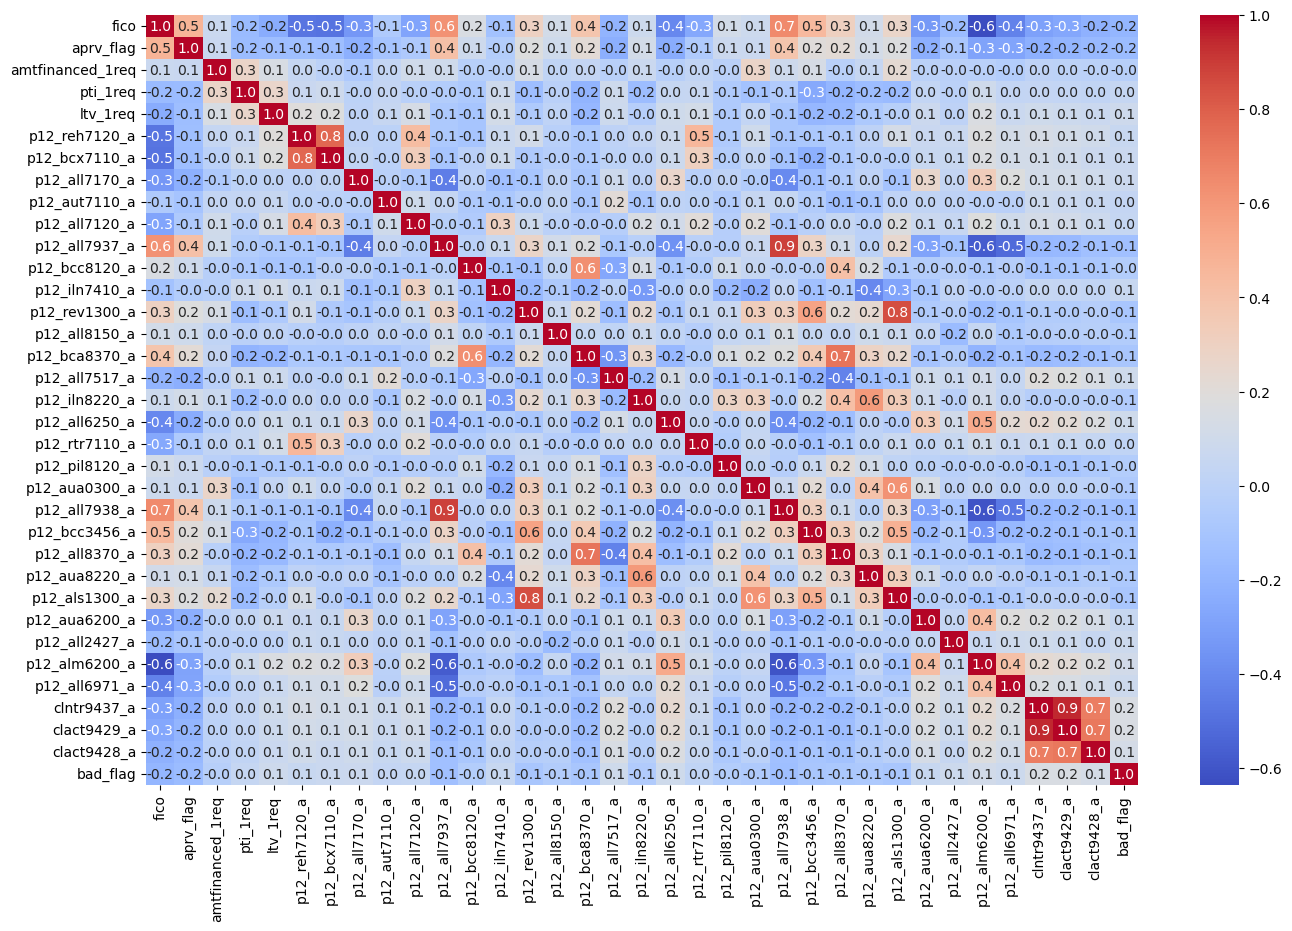

In [195]:
#Finding the Correlation matrix
categ_columns1 = ['collateral_dlrinput_newused_1req','Race','Gender']
numerical_columns = train_df1.drop(columns=categ_columns1)
correlation_matrix = numerical_columns.corr()
print(correlation_matrix)

# Plotting the coorelation matrix
plt.figure(figsize=(16,10))
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm', fmt = '.1f' , cbar =True, xticklabels= correlation_matrix.columns, yticklabels = correlation_matrix.columns)
plt.title('')
plt.show()

In [196]:
# Constants for feature transformation
SKW_THRESH = 1.5  # Skewness threshold
CORR_THRESH = 0.8  # Correlation threshold for dropping

# Initialize storage for feature transformation details
info = []
columns_to_transform = []

# Apply log transformation to skewed features for both train and test data
for col in numerical_predictors:
    try:
        # Calculate skewness for original and log-transformed features
        log_transformed_train = np.log1p(train_df1[col])  # log(x+1) transformation to handle zeros
        log_transformed_test = np.log1p(test_df1[col])

        orig_skew_train = train_df1[col].skew()
        log_skew_train = log_transformed_train.skew()

        # Compute correlation with log-odds for the original feature (train data)
        deciles_train = pd.qcut(train_df1[col], q=10, duplicates='drop')
        mean_target_train = train_df1.groupby(deciles_train, observed=True)['aprv_flag'].mean().reset_index()
        if len(mean_target_train) >= 2:
            mean_target_train['decile_mid'] = mean_target_train[deciles_train.name].map(lambda x: x.mid)
            epsilon = 1e-10  # Prevent division by zero
            mean_target_train['log_odds'] = np.log((mean_target_train['aprv_flag'] + epsilon) / (1 - mean_target_train['aprv_flag'] + epsilon))
            corr_original_train = abs(stats.pearsonr(mean_target_train['decile_mid'], mean_target_train['log_odds'])[0])
        else:
            corr_original_train = 0

        # Compute correlation with log-odds for the log-transformed feature (train data)
        log_deciles_train = pd.qcut(log_transformed_train, q=10, duplicates='drop')
        log_mean_target_train = train_df1.groupby(log_deciles_train, observed=True)['aprv_flag'].mean().reset_index()
        if len(log_mean_target_train) >= 2:
            log_mean_target_train['decile_mid'] = log_mean_target_train[log_deciles_train.name].map(lambda x: x.mid)
            log_mean_target_train['log_odds'] = np.log((log_mean_target_train['aprv_flag'] + epsilon) / (1 - log_mean_target_train['aprv_flag'] + epsilon))
            log_corr_train = abs(stats.pearsonr(log_mean_target_train['decile_mid'], log_mean_target_train['log_odds'])[0])
        else:
            log_corr_train = 0

        # Log the feature's original skewness, log skewness, and correlation values
        info.append({
            'feature': col,
            'original_skewness': orig_skew_train,
            'log_skewness': log_skew_train,
            'original_corr': corr_original_train,
            'log_corr': log_corr_train,
            'transform': (orig_skew_train > SKW_THRESH) and (log_corr_train > corr_original_train * CORR_THRESH)
        })

        # Apply the transformation if conditions are met
        if (orig_skew_train > SKW_THRESH) and (log_corr_train > corr_original_train * CORR_THRESH):
            columns_to_transform.append(col)

    except Exception as e:
        print(f"Error processing column {col}: {str(e)}")
        continue

# Ensure that the column is of float type before applying the log transformation
train_df1[col] = train_df1[col].astype(float)
test_df1[col] = test_df1[col].astype(float)


# Apply log transformation for selected columns in both train and test data
for col in columns_to_transform:
    train_df1.loc[:, col] = np.log1p(train_df1[col])
    test_df1.loc[:, col] = np.log1p(test_df1[col])

# Drop highly correlated features (correlation > 0.8) for both train and test data
# Select only the numeric columns before calculating the correlation matrix
numeric_columns_train = train_df1.select_dtypes(include=['float64', 'int64']).columns
numeric_columns_test = test_df1.select_dtypes(include=['float64', 'int64']).columns

# Calculate correlation matrices for both train and test data
correlation_matrix_train = train_df1[numeric_columns_train].corr()
correlation_matrix_test = test_df1[numeric_columns_test].corr()

columns_drop = set()
for i in range(len(correlation_matrix_train.columns)):
    for j in range(i):
        if abs(correlation_matrix_train.iloc[i, j]) >= CORR_THRESH:
            colname = correlation_matrix_train.columns[i]
            columns_drop.add(colname)

# Drop the highly correlated columns from both train and test datasets
train_df2 = train_df1.drop(columns=columns_drop)
test_df2 = test_df1.drop(columns=columns_drop)

# Convert the info list to a DataFrame for inspection
info_df = pd.DataFrame(info)

# Print out the result
print(f"Transformed {len(columns_to_transform)} columns: {columns_to_transform}")
print(f"Dropped {len(columns_drop)} correlated columns: {columns_drop}")


Transformed 13 columns: ['p12_all7170_a', 'p12_bcc8120_a', 'p12_rev1300_a', 'p12_all8150_a', 'p12_bca8370_a', 'p12_all6250_a', 'p12_pil8120_a', 'p12_aua0300_a', 'p12_bcc3456_a', 'p12_aua6200_a', 'p12_all6971_a', 'clntr9437_a', 'clact9429_a']
Dropped 2 correlated columns: {'p12_all7938_a', 'clact9429_a'}


/var/folders/7y/sv20nt8s23xd99h882jm5z4c0000gs/T/ipykernel_28154/3255378660.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df1[col] = train_df1[col].astype(float)
/var/folders/7y/sv20nt8s23xd99h882jm5z4c0000gs/T/ipykernel_28154/3255378660.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df1[col] = test_df1[col].astype(float)
/var/folders/7y/sv20nt8s23xd99h882jm5z4c0000gs/T/ipykernel_28154/3255378660.py:65: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise

In [197]:
test_df2.head()

,fico,aprv_flag,amtfinanced_1req,collateral_dlrinput_newused_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,...,p12_als1300_a,p12_aua6200_a,p12_all2427_a,p12_alm6200_a,p12_all6971_a,clntr9437_a,clact9428_a,bad_flag,Gender,Race
0,681.0,1,30966.0,USED,4.74,91.96,85.0,70.0,0.0,72.0,...,6.0,0.693147,0,30,0.693147,0.000000,0.0,0.0,Undefined,White
1,626.0,0,18363.0,USED,3.37,87.90,52.0,26.0,0.0,85.0,...,16.0,5.993961,0,400,5.993961,1.386294,0.0,0.0,Female,White
2,776.0,1,50768.0,NEW,3.86,107.87,22.0,18.0,0.0,83.0,...,15.0,0.693147,0,30,0.693147,0.000000,0.0,0.0,Female,Hispanic
3,721.0,1,49657.0,NEW,3.71,99.36,93.0,83.0,0.0,61.0,...,35.0,4.110874,0,90,0.693147,0.000000,0.0,0.0,Male,White
4,701.0,0,14412.0,USED,7.94,111.50,42.0,20.0,0.0,72.0,...,4.0,0.693147,0,1,0.693147,0.000000,0.0,0.0,Female,White


In [198]:
print(columns_drop)

{'p12_all7938_a', 'clact9429_a'}


In [199]:
# Define features and target, making sure to exclude 'aprv_flag'
X_train = train_df2.drop(columns=['aprv_flag'])
y_train = train_df2['aprv_flag']
X_test = test_df2.drop(columns=['aprv_flag'])
y_test = test_df2['aprv_flag']

# Recompute numerical columns 
num_cols = X_train.select_dtypes(include=['number']).columns

# Apply RobustScaler to numerical features only
scaler = RobustScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Final dataset shapes
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")



X_train shape: (21606, 35), y_train shape: (21606,)
X_test shape: (5400, 35), y_test shape: (5400,)


In [200]:
# One-hot encoding of categorical columns
train_df_encoded = pd.get_dummies(train_df2, columns=['collateral_dlrinput_newused_1req','Race','Gender'], drop_first=False)

# Convert the newly created dummy columns to int type
dummy_columns = train_df_encoded.columns.difference(train_df2.columns)
train_df_encoded[dummy_columns] = train_df_encoded[dummy_columns].astype(int)

# Display the first few rows of the encoded DataFrame
train_df_encoded.head()

,fico,aprv_flag,amtfinanced_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,p12_all7120_a,...,collateral_dlrinput_newused_1req_NEW,collateral_dlrinput_newused_1req_USED,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Gender_Female,Gender_Male,Gender_Undefined
0,581.0,0,32115.0,15.29,105.30,72.0,72.0,1.386294,84.0,89.0,...,1,0,0,0,0,0,1,1,0,0
1,707.0,1,21436.0,4.63,102.12,100.0,84.0,0.000000,72.0,100.0,...,0,1,0,0,0,0,1,0,1,0
2,689.0,0,26930.0,6.61,109.24,76.0,13.0,0.000000,72.0,76.0,...,0,1,0,0,0,0,1,0,0,1
3,811.0,1,18140.0,3.08,49.03,12.0,12.0,0.000000,34.0,99.0,...,0,1,0,0,0,1,0,1,0,0
4,631.0,0,9874.0,2.62,140.56,52.0,26.0,0.000000,72.0,93.0,...,0,1,0,0,0,0,1,0,1,0


In [201]:
# One-hot encoding of categorical columns
test_df_encoded = pd.get_dummies(test_df2, columns=['collateral_dlrinput_newused_1req','Race','Gender'], drop_first=False)

# Convert the newly created dummy columns to int type
dummy_columns = test_df_encoded.columns.difference(test_df2.columns)
test_df_encoded[dummy_columns] = test_df_encoded[dummy_columns].astype(int)

# Display the first few rows of the encoded DataFrame
test_df_encoded.head()

,fico,aprv_flag,amtfinanced_1req,pti_1req,ltv_1req,p12_reh7120_a,p12_bcx7110_a,p12_all7170_a,p12_aut7110_a,p12_all7120_a,...,collateral_dlrinput_newused_1req_NEW,collateral_dlrinput_newused_1req_USED,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,Gender_Female,Gender_Male,Gender_Undefined
0,681.0,1,30966.0,4.74,91.96,85.0,70.0,0.0,72.0,85.0,...,0,1,0,0,0,0,1,0,0,1
1,626.0,0,18363.0,3.37,87.90,52.0,26.0,0.0,85.0,85.0,...,0,1,0,0,0,0,1,1,0,0
2,776.0,1,50768.0,3.86,107.87,22.0,18.0,0.0,83.0,94.0,...,1,0,0,0,1,0,0,1,0,0
3,721.0,1,49657.0,3.71,99.36,93.0,83.0,0.0,61.0,93.0,...,1,0,0,0,0,0,1,0,1,0
4,701.0,0,14412.0,7.94,111.50,42.0,20.0,0.0,72.0,42.0,...,0,1,0,0,0,0,1,1,0,0


In [202]:
# Split the data into train and test
X= train_df_encoded.drop(columns = 'aprv_flag')
y = train_df_encoded['aprv_flag'].astype(int)

X_train,X_test, y_train, y_test= train_test_split(X,y, test_size = 0.2, random_state= 60)